## [HuggingFaceQuide: Zero-shot image-to-text generation with BLIP-2](https://huggingface.co/blog/blip-2#image-captioning)  
* [Official Tutorial](https://huggingface.co/docs/transformers/main/en/model_doc/blip-2)

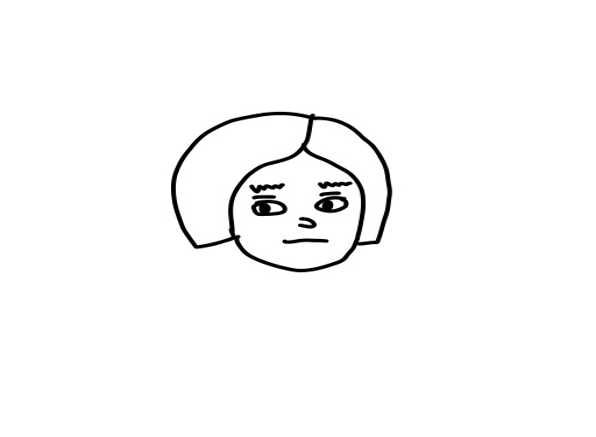

In [1]:
import requests
from PIL import Image 

image = Image.open('../Dataset/sketch/train/1.normal_face/normal_face(1).png').convert('RGB')
display(image.resize((596, 437)))

In [2]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-opt-2.7b", load_in_8bit=True, device_map={"": 0}, torch_dtype=torch.float16
)  # doctest: +IGNORE_RESULT


/home/yunsketch/.conda/envs/blip2/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

a drawing of a woman's face with a sad expression


In [8]:
# Prompted Image Captioning
prompt = "this is a drawing/sketch of a"

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

woman's face


In [5]:
# Visual Question Answering
prompt = "Question: How short her hair is? Answer:"

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

It's short


In [6]:
# Questions
import pandas as pd

questions = pd.read_csv('../Dataset/qa/train.csv', index_col=0)
# image_id가 normal_face(1)인 질문과 답변만 가져오기
questions = questions[questions.image_id == 'normal_face(1)']
questions

,image_id,question,answer
0,normal_face(1),What is the sketch about?,human face
1,normal_face(1),What kind of expression is the person making i...,normal
2,normal_face(1),Does this person wear eyeglasses?,no
3,normal_face(1),Does this person wear sunglasses?,no
4,normal_face(1),Does this person wear a necklace?,no
5,normal_face(1),Does this person wear earrings?,no
6,normal_face(1),Does this person wear a hat?,no


In [7]:
# 질문에 대해서 모델의 답변 생성
for question in questions.question:
    prompt = f"Question: {question} Answer:"
    inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)
    generated_ids = model.generate(**inputs)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
    print(generated_text)

The sketch is about a girl who is
The person
No
No
No
No
No
